In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('Group_6_data_cleaned.csv')
data.head()

,Unnamed: 0,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,0,1,-1,1,-1,-1,1,1,1,0,0
1,1,-1,-1,-1,-1,-1,0,1,1,1,1
2,2,1,-1,0,0,-1,0,-1,1,0,1
3,3,1,0,1,-1,-1,0,1,1,0,0
4,4,-1,-1,1,-1,0,0,-1,1,0,1


In [3]:
data.columns

Index(['Unnamed: 0', 'SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL',
       'URL_of_Anchor', 'web_traffic', 'URL_Length', 'age_of_domain',
       'having_IP_Address', 'Result'],
      dtype='object')

In [4]:
# removing redundant column
df = data.drop(['Unnamed: 0'],axis=1)

In [5]:
df.shape

(1353, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWidnow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


In [7]:
df['Result'].unique()

array([ 0,  1, -1])

In [8]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### SGD classifier 

In [9]:
X = df.drop(['Result'],axis=1)
y = df['Result']

In [10]:
# importing Standard scalar for the data transformation
# Scaling is very important in the case of linear models
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
print(scaled_X)

[[ 0.83184339 -1.09206271  0.81833407 ...  1.38168214  0.8
  -0.35969752]
 [-1.35144295 -1.09206271 -1.61508571 ...  1.38168214  0.8
   2.78011371]
 [ 0.83184339 -1.09206271 -0.39837582 ... -1.24205952  0.8
  -0.35969752]
 ...
 [-1.35144295  0.38107871 -1.61508571 ... -1.24205952 -1.25
  -0.35969752]
 [-0.25979978  0.38107871  0.81833407 ... -1.24205952  0.8
  -0.35969752]
 [ 0.83184339  0.38107871  0.81833407 ... -1.24205952 -1.25
  -0.35969752]]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, random_state=100)

In [12]:
from sklearn.metrics import confusion_matrix, classification_report, recall_score, accuracy_score, roc_auc_score,f1_score

In [13]:
md = SGDClassifier()
md.fit(X_train,y_train)


SGDClassifier()

### Hyper parameter with randomized search method 

In [14]:
from sklearn.model_selection import  RandomizedSearchCV
parameters = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e-0,1e-1,1e-2], 'loss': ['log','hinge'], 'penalty': ['l2','l1'],'n_jobs': [-1,1]
}
sgd = SGDClassifier()
randomized = RandomizedSearchCV(sgd,parameters,random_state=0)
randomized.fit(X_train,y_train)

RandomizedSearchCV(estimator=SGDClassifier(),
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0,
                                                  0.1, 0.01],
                                        'loss': ['log', 'hinge'],
                                        'n_jobs': [-1, 1],
                                        'penalty': ['l2', 'l1']},
                   random_state=0)

In [15]:
randomized.best_params_

{'penalty': 'l2', 'n_jobs': -1, 'loss': 'log', 'alpha': 0.1}

In [16]:
# sgd model with best hyper parameters
import pickle
sgd_model = SGDClassifier(penalty='l2',n_jobs=1,loss='log',alpha=0.1)
sgd_model.fit(X_train,y_train)
model_name = 'sgd_model.sav'
pickle.dump(sgd_model, open(model_name, 'wb'))

### Evalution metrics 

In [17]:
# Trainina and testing accuracy
y_train_pred = sgd_model.predict(X_train)
y_test_pred  = sgd_model.predict(X_test)
print(f" The accuracy for traing data is {accuracy_score(y_train,y_train_pred)}")
print(f" The accuracy for testing data is {accuracy_score(y_test,y_test_pred)}")
print(f" The recall score for traing data is {recall_score(y_train,y_train_pred,average='weighted')} ")
print(f" The recall score for testing data is {recall_score(y_test,y_test_pred,average='weighted')} ")
print(f" The f-1 score for the training data is {f1_score(y_train,y_train_pred,average= 'weighted')}")
print(f" The f-1 score for the testing data is {f1_score(y_test,y_test_pred,average= 'weighted')}")


 The accuracy for traing data is 0.8416050686378036
 The accuracy for testing data is 0.8152709359605911
 The recall score for traing data is 0.8416050686378036 
 The recall score for testing data is 0.8152709359605911 
 The f-1 score for the training data is 0.8082113213941247
 The f-1 score for the testing data is 0.7826660246675803


In [18]:
#roc auc score 
y_train_roc = sgd_model.predict_proba(X_train)
y_test_roc = sgd_model.predict_proba(X_test)
train_roc_score = roc_auc_score(y_train,y_train_roc,average='macro',multi_class='ovo')
test_roc_score = roc_auc_score(y_test,y_test_roc,average='macro',multi_class='ovo')
print(f" The training roc auc score {train_roc_score}")
print(f" The testing roc auc score {test_roc_score}")

 The training roc auc score 0.8684911610509247
 The testing roc auc score 0.8583788706739526


In [19]:
# confusion matrix for training data
print(confusion_matrix(y_train,y_train_pred))

[[477   0  33]
 [ 36   0  36]
 [ 45   0 320]]


In [20]:
# confusion matrix for testing data
print(confusion_matrix(y_test,y_test_pred))

[[179   0  13]
 [ 18   0  13]
 [ 31   0 152]]


In [21]:
# classification report for training data 
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

          -1       0.85      0.94      0.89       510
           0       0.00      0.00      0.00        72
           1       0.82      0.88      0.85       365

    accuracy                           0.84       947
   macro avg       0.56      0.60      0.58       947
weighted avg       0.78      0.84      0.81       947



/Users/kirankumarvelinedi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kirankumarvelinedi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kirankumarvelinedi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [22]:
# classification report for test data
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

          -1       0.79      0.93      0.85       192
           0       0.00      0.00      0.00        31
           1       0.85      0.83      0.84       183

    accuracy                           0.82       406
   macro avg       0.55      0.59      0.56       406
weighted avg       0.76      0.82      0.78       406



/Users/kirankumarvelinedi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kirankumarvelinedi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kirankumarvelinedi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

/Users/kirankumarvelinedi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


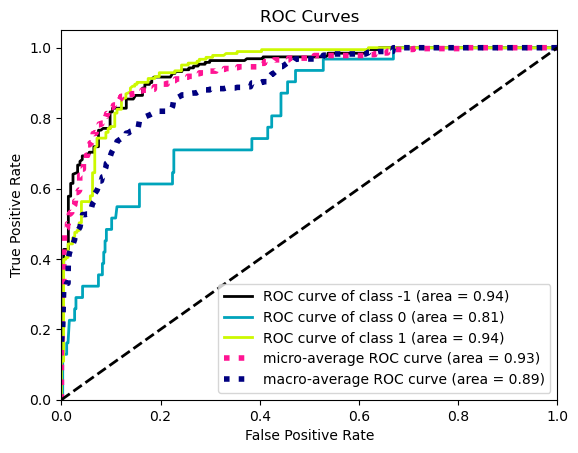

In [23]:
import sklearn.metrics as metrics
import scikitplot as skplt
import matplotlib.pyplot as plt
y_probas = sgd_model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test,y_probas)
plt.show()